<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Datasets

In [ ]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Correlation

In [ ]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

<Axes: >

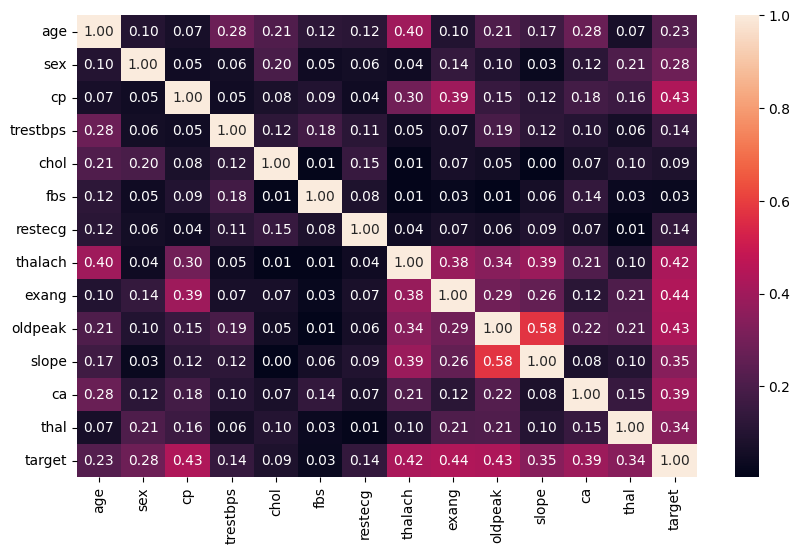

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().abs(), annot=True, fmt='.2f')

#Data Visualization

<Axes: xlabel='sex', ylabel='count'>

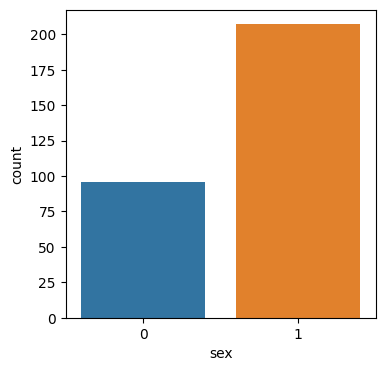

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x = df['sex'], data=df)

<Axes: xlabel='cp', ylabel='count'>

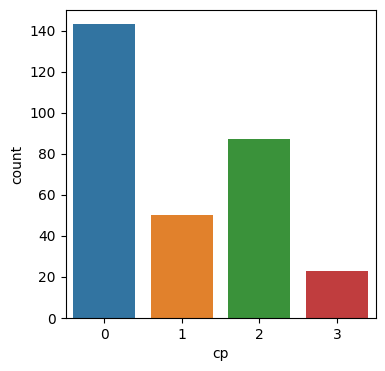

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x = df['cp'], data=df)

<Axes: xlabel='fbs', ylabel='count'>

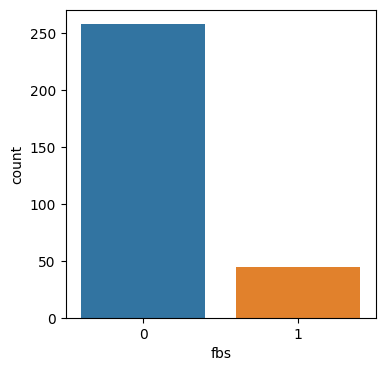

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x = df['fbs'], data=df)

<Axes: xlabel='restecg', ylabel='count'>

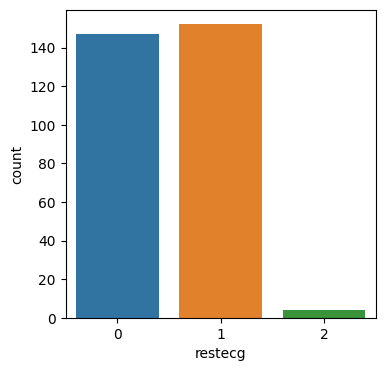

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x= df['restecg'], data=df)

<Axes: xlabel='exang', ylabel='count'>

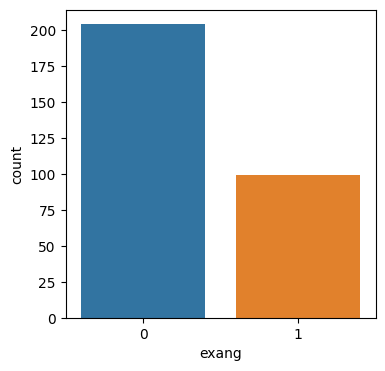

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x= df['exang'], data=df)

<Axes: xlabel='slope', ylabel='count'>

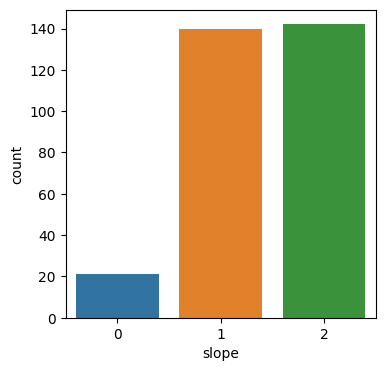

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x= df['slope'], data=df)

<Axes: xlabel='ca', ylabel='count'>

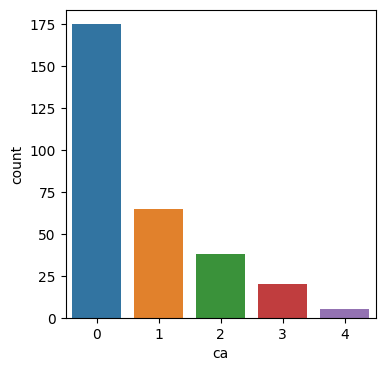

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x= df['ca'], data=df)

<Axes: xlabel='thal', ylabel='count'>

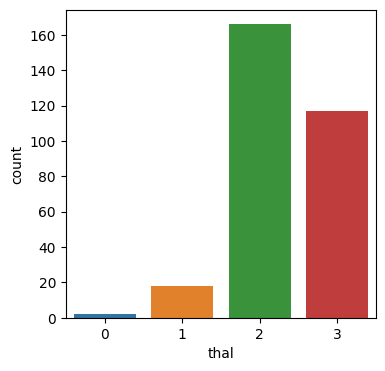

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x= df['thal'], data=df)

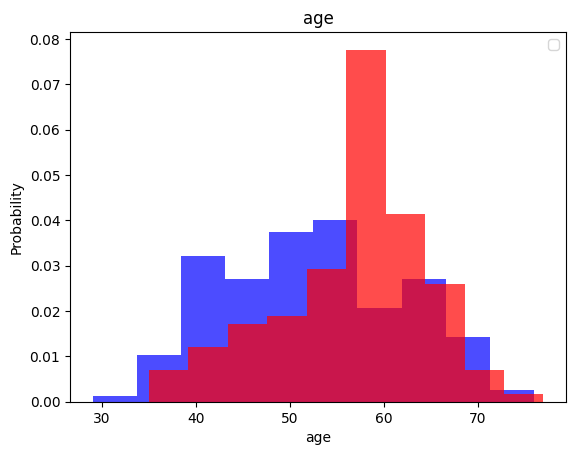

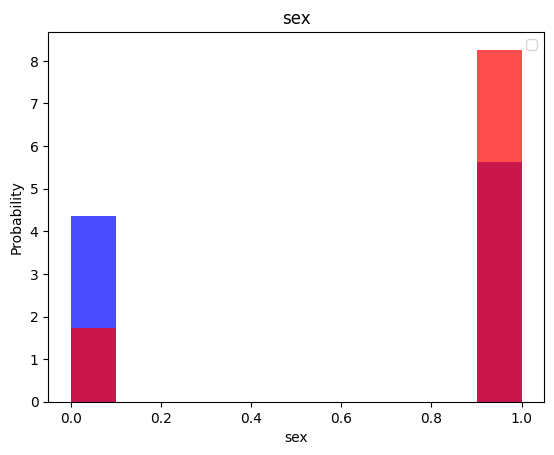

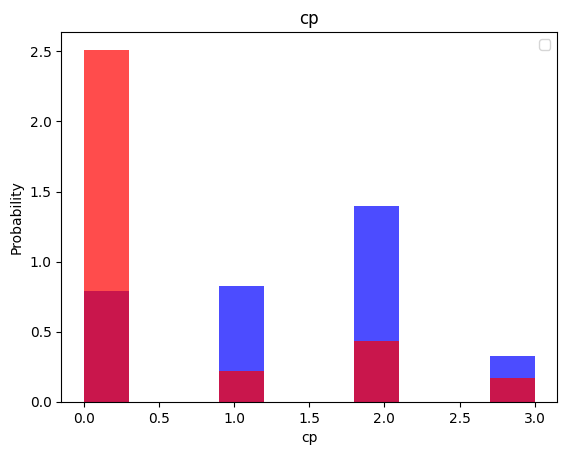

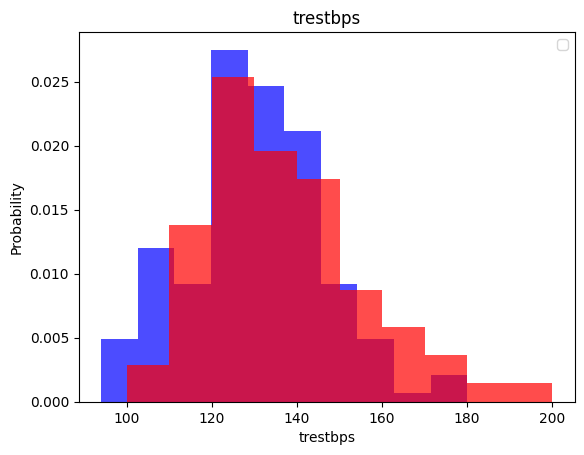

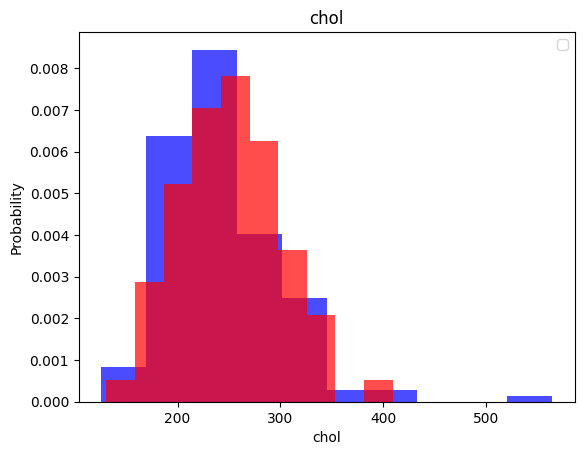

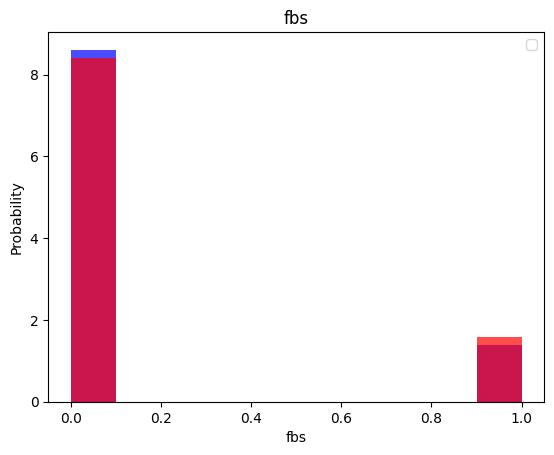

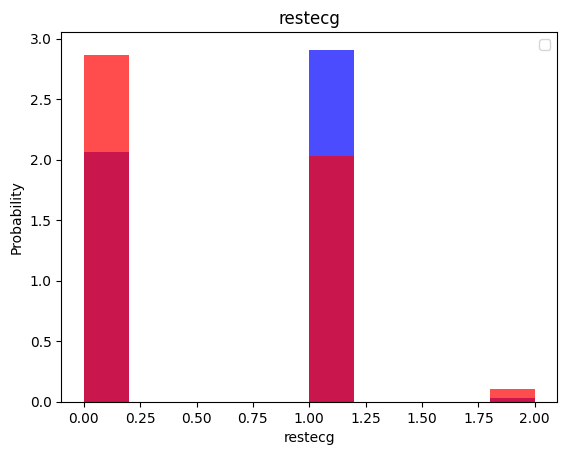

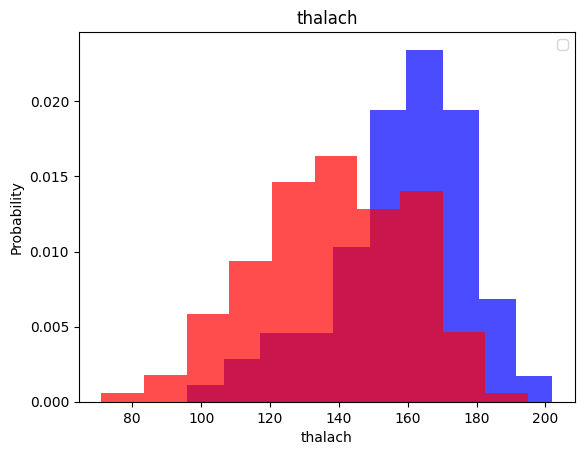

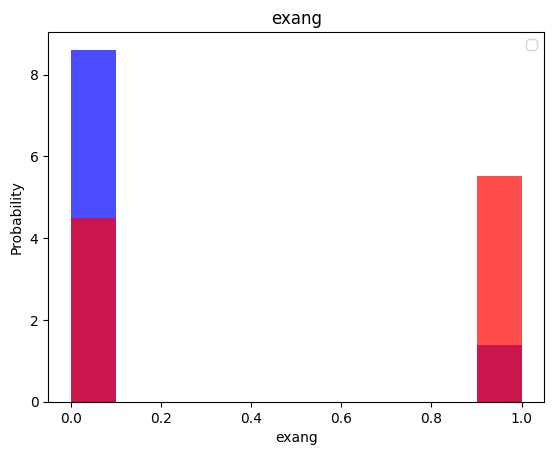

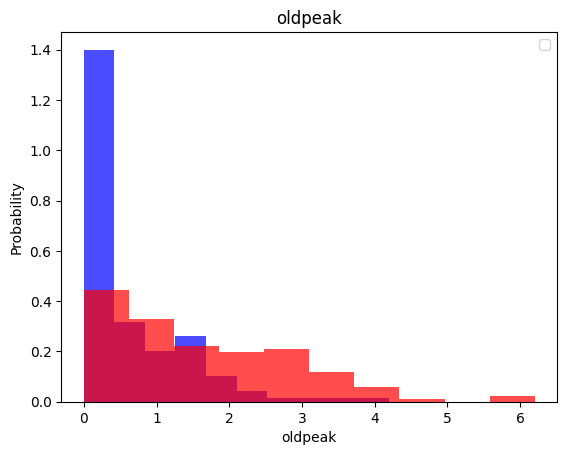

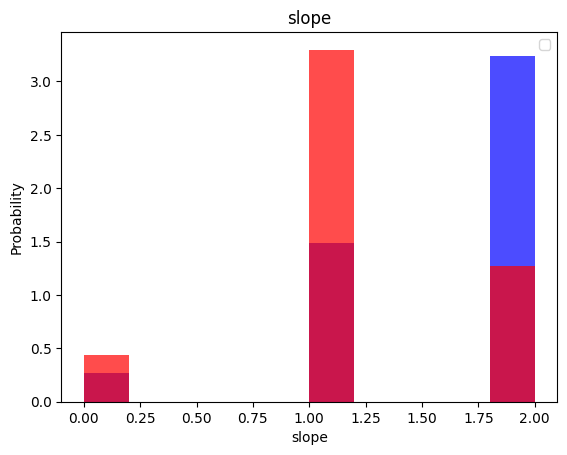

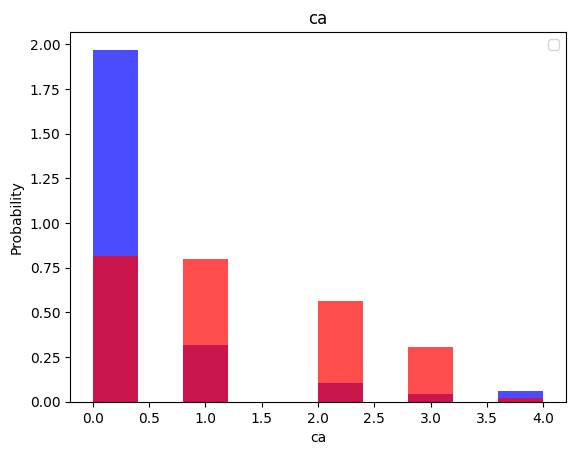

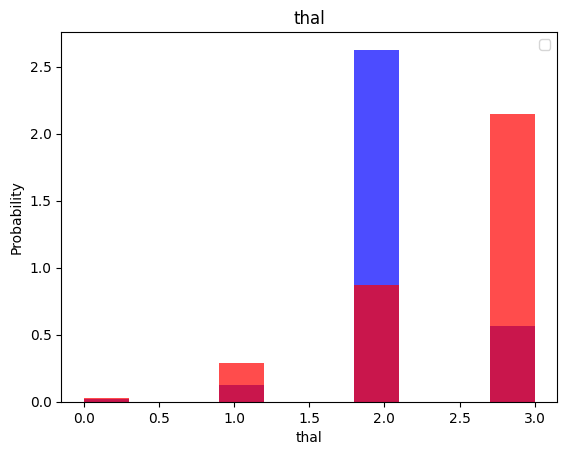

In [ ]:
for column in df.columns[:-1]:
  plt.hist(df[df['target']==1][column], color='blue', alpha=0.7, density=True)
  plt.hist(df[df['target']==0][column], color='red', alpha=0.7, density=True)
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

#Normalization

In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    over = RandomOverSampler()
    x, y = over.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

#Train/Validation/Testing dataset

In [ ]:
train, test, valid = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.94      0.92      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



#Logistic

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
l_model = LogisticRegressionCV()
l_model.fit(x_train, y_train)

LogisticRegressionCV()

In [ ]:
y_pred = l_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
n_model = GaussianNB()
n_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = n_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


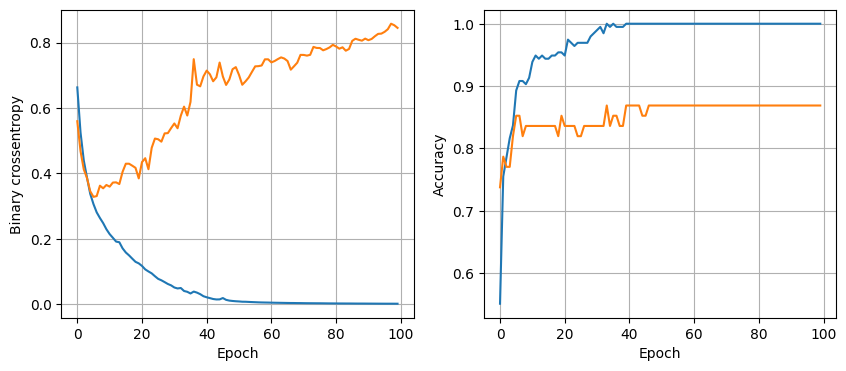

2/2 [==============================] - 0s 20ms/step - loss: 0.8453 - accuracy: 0.8689
16 nodes, dropout 0, lr 0.01, batch_size 64


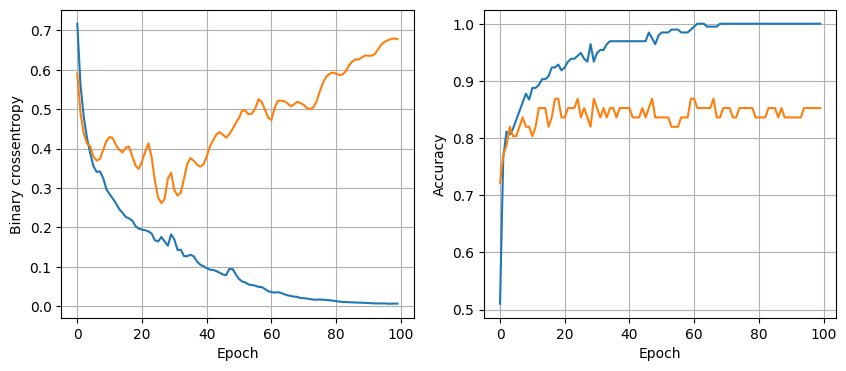

2/2 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.8525
16 nodes, dropout 0, lr 0.001, batch_size 32


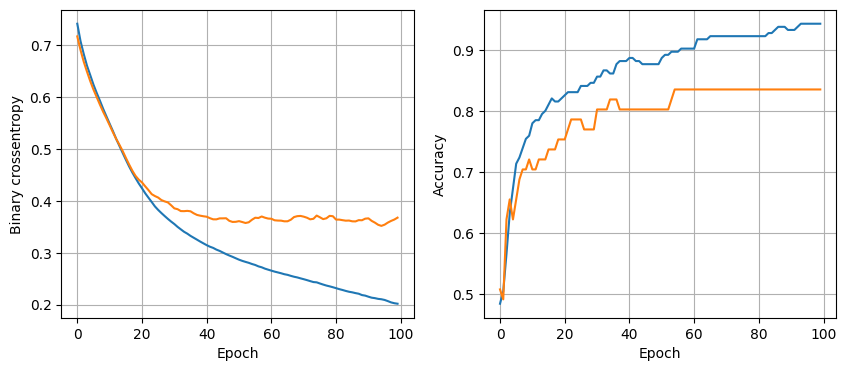

2/2 [==============================] - 0s 11ms/step - loss: 0.3678 - accuracy: 0.8361
16 nodes, dropout 0, lr 0.001, batch_size 64


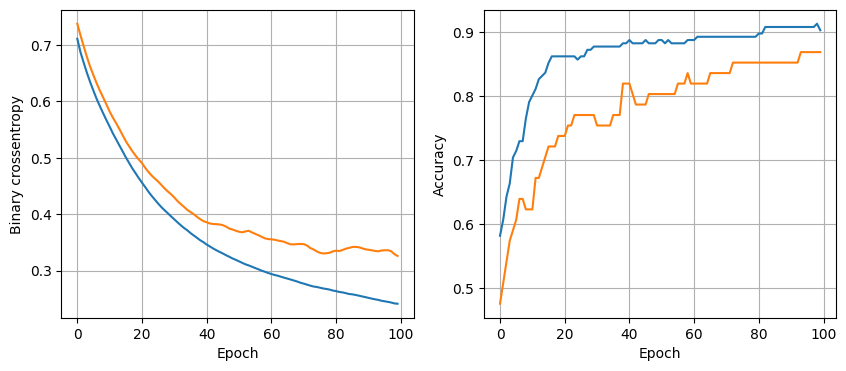

2/2 [==============================] - 0s 7ms/step - loss: 0.3260 - accuracy: 0.8689
16 nodes, dropout 0.2, lr 0.01, batch_size 32


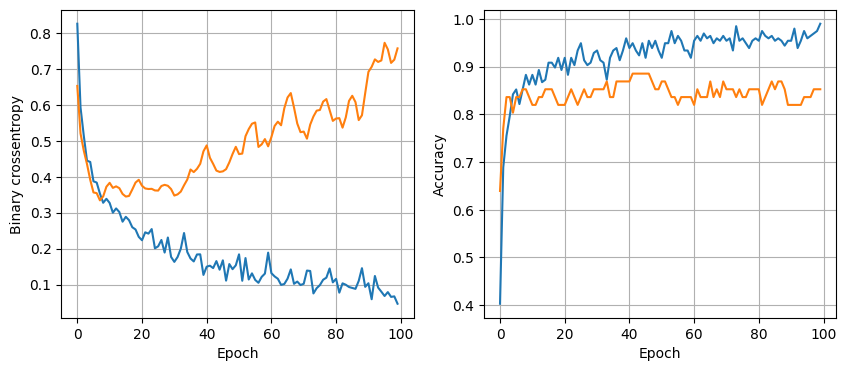

2/2 [==============================] - 0s 13ms/step - loss: 0.7571 - accuracy: 0.8525
16 nodes, dropout 0.2, lr 0.01, batch_size 64


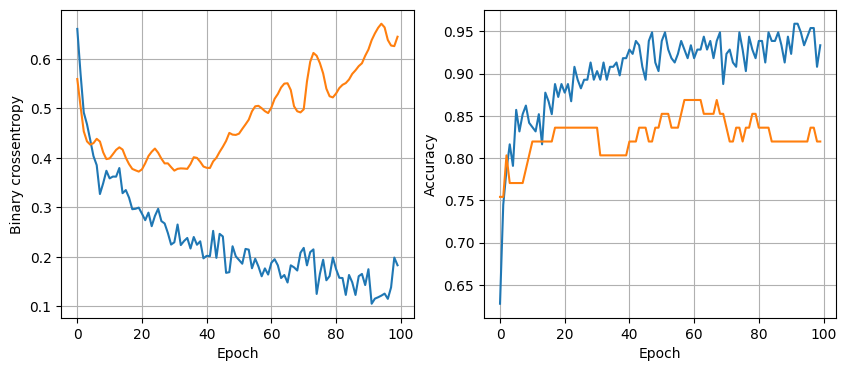

2/2 [==============================] - 0s 7ms/step - loss: 0.6447 - accuracy: 0.8197
16 nodes, dropout 0.2, lr 0.001, batch_size 32


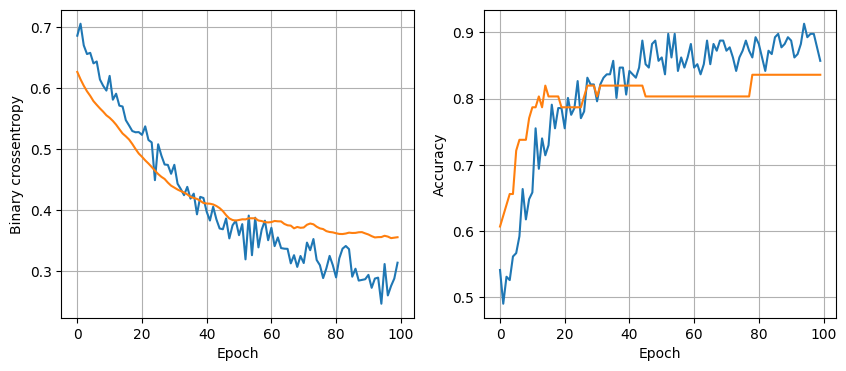

2/2 [==============================] - 0s 8ms/step - loss: 0.3560 - accuracy: 0.8361
16 nodes, dropout 0.2, lr 0.001, batch_size 64


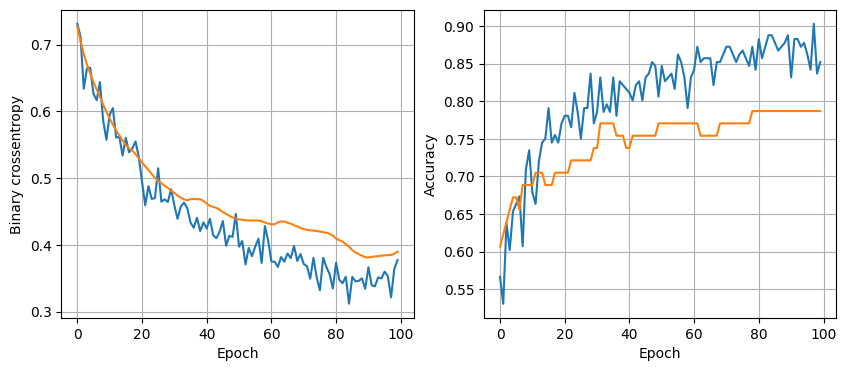

2/2 [==============================] - 0s 8ms/step - loss: 0.3900 - accuracy: 0.7869
32 nodes, dropout 0, lr 0.01, batch_size 32


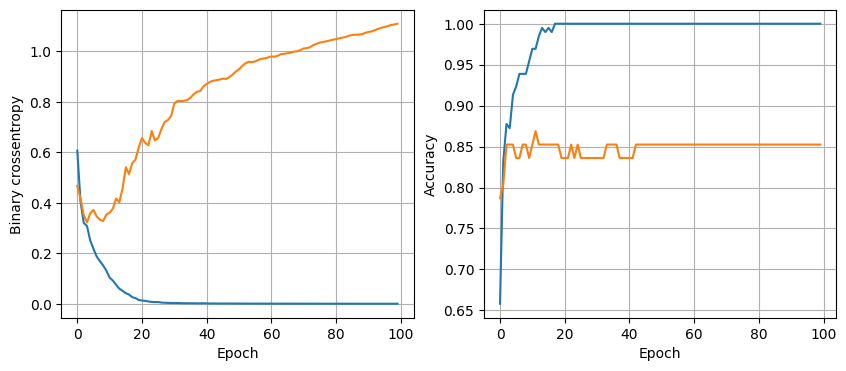

2/2 [==============================] - 0s 8ms/step - loss: 1.1090 - accuracy: 0.8525
32 nodes, dropout 0, lr 0.01, batch_size 64


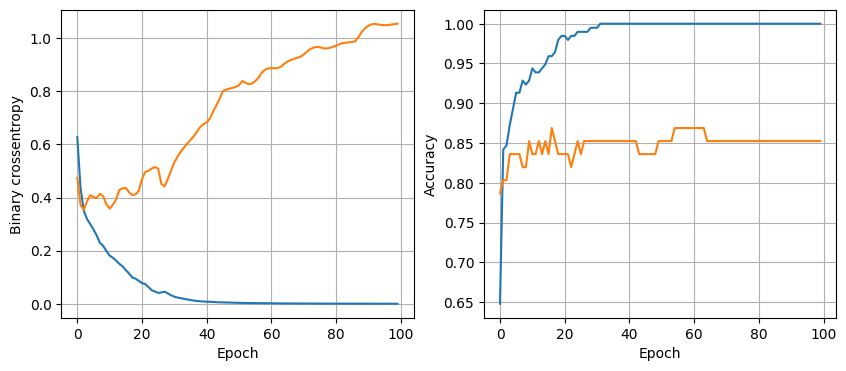

2/2 [==============================] - 0s 10ms/step - loss: 1.0539 - accuracy: 0.8525
32 nodes, dropout 0, lr 0.001, batch_size 32


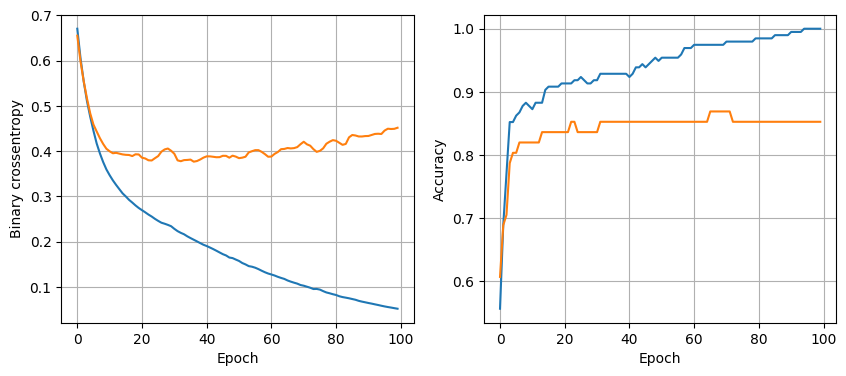

2/2 [==============================] - 0s 15ms/step - loss: 0.4516 - accuracy: 0.8525
32 nodes, dropout 0, lr 0.001, batch_size 64


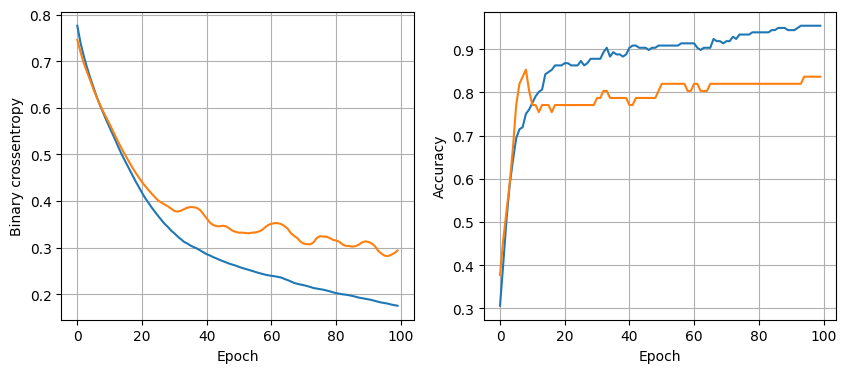

2/2 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.8361
32 nodes, dropout 0.2, lr 0.01, batch_size 32


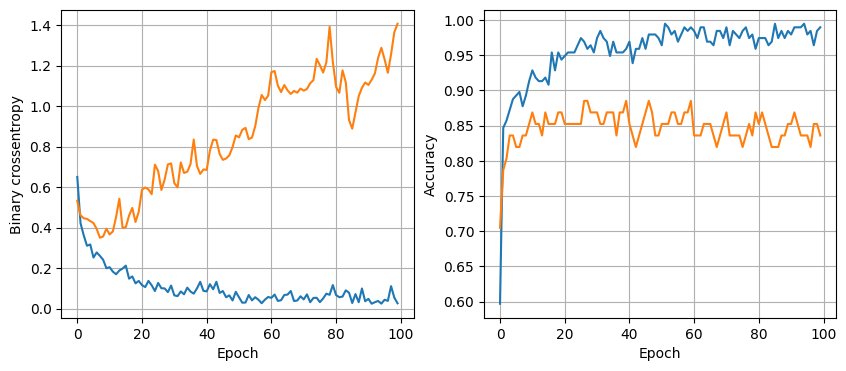

2/2 [==============================] - 0s 8ms/step - loss: 1.4075 - accuracy: 0.8361
32 nodes, dropout 0.2, lr 0.01, batch_size 64


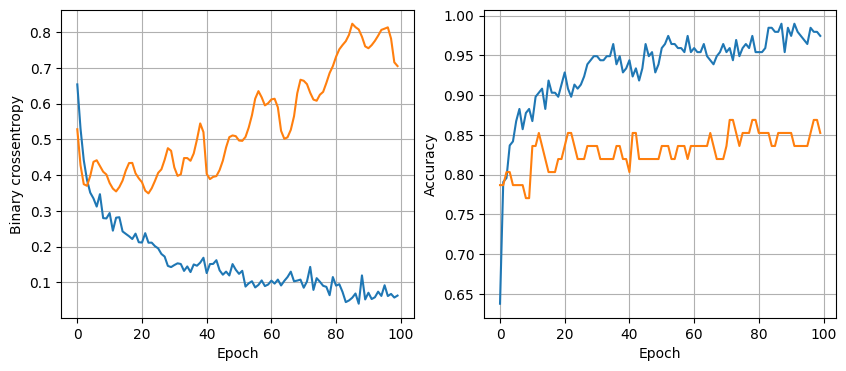

2/2 [==============================] - 0s 15ms/step - loss: 0.7048 - accuracy: 0.8525
32 nodes, dropout 0.2, lr 0.001, batch_size 32


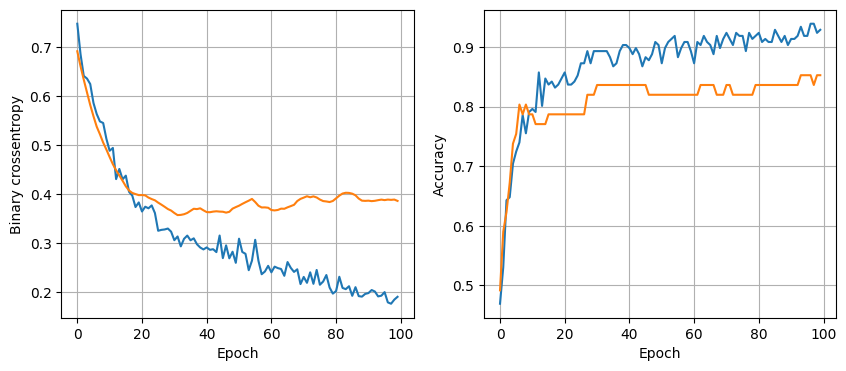

2/2 [==============================] - 0s 8ms/step - loss: 0.3865 - accuracy: 0.8525
32 nodes, dropout 0.2, lr 0.001, batch_size 64


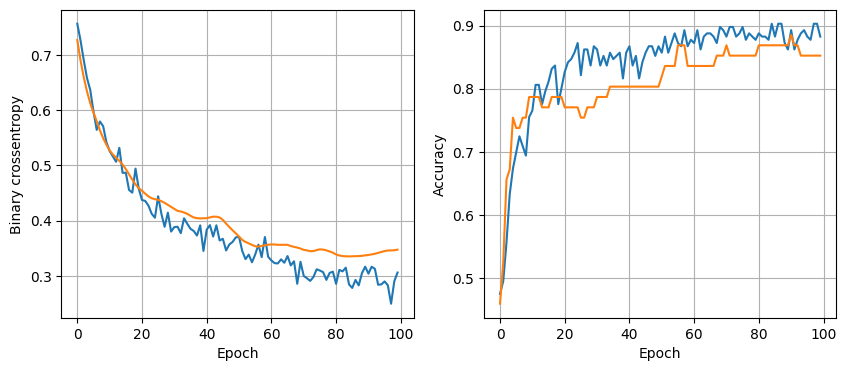

2/2 [==============================] - 0s 15ms/step - loss: 0.3473 - accuracy: 0.8525
64 nodes, dropout 0, lr 0.01, batch_size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

